# Final year L6 Project

The following project creates a Convolutional Neural Network based on the following dataset: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
Please note that any already displayed results in this file are from previous tests and do not reflect the final results of the model used in the application, please refer to the report to view those results

# Beginning stages

**Importing libraries**

In [1]:
import os
import tensorflow as tf
import cv2 #checkout open cv
import imghdr #allows to check file extensions for images
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random
import shutil

from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.python.keras.models import sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

**GPU/CPU checks and opitmisation**

In [2]:
tf.config.list_physical_devices(device_type=None)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [13]:
gpus = tf.config.experimental.list_physical_devices('GPU')
cpu = tf.config.experimental.list_physical_devices('CPU')

if (cpu):
    print("Currently using CPU, GPU utilisation unavaliable.")
else:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except:
        print("Failed, GPU error.")
    else:
        print("Success!")

Currently using CPU, GPU utilisation unavaliable


# Pre-processing the data

**Initialising paths and labels**

In [14]:
testing_path = '/kaggle/input/brain-tumor-classification-mri/Testing'
training_path = '/kaggle/input/brain-tumor-classification-mri/Training'

In [15]:
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

**Splitting images and labels into testing and training sets**

In [16]:
x_train = [] 
y_train = [] 

x_test = []
y_test = []

for i in labels:  
  # training set
  path = os.path.join(training_path, i)
  for file_name in os.listdir(path):
    img = cv2.imread(os.path.join(path, file_name))
    img = cv2.resize(img, (224, 224)) #Resizing images
    img = img.astype('float32') / 255.0 #Normalising values
    x_train.append(img)
    y_train.append(i)

  # testing set
  path = os.path.join(testing_path, i)
  for file_name in os.listdir(path):
    img = cv2.imread(os.path.join(path, file_name))
    img = cv2.resize(img, (224, 224))
    img = img.astype('float32') / 255.0
    x_test.append(img)
    y_test.append(i)

In [17]:
#Creating numpy arrays to store labels and images in
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
for i in range(1):
    print(x_train, x_test)

**One-hot encoding**

In [8]:
y_train_onehot = []
y_test_onehot = []

**One-hot encode training labels**

In [9]:
#Appending new labels
try:
    for i in y_train:
      y_train_onehot.append(labels.index(i))
    y_train = y_train_onehot
    y_train = to_categorical(y_train) 
except:
    print("Something went wrong when trying to encode 'y_train_onehot'")
else:
    print("labels from 'y_train_onehot' successfully appended into 'y_train'")
    for p in range(4):
        print(y_train)

labels from 'y_train_onehot' successfully appended into 'y_train'
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


**One-hot encode testing labels**

In [10]:
try:
    for i in y_test:
      y_test_onehot.append(labels.index(i))
    y_test = y_test_onehot
    y_test = to_categorical(y_test) 
except:
    print("Something went wrong when trying to encode 'y_test_onehot'")
else:
    print("labels from 'y_test_onehot' successfully appended into 'y_test'")
    for p in range(4):
        print(y_test)

labels from 'y_test_onehot' successfully appended into 'y_test'
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


**Shuffling the data**

In [11]:
x_train, y_train = shuffle(x_train, y_train)

**Implementing a 10% in memory validation split**

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1) #10% validation split

# Initialising callbacks - Initial stages of training the model

In [13]:
reduce_lr_on_plat = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, mode='auto', verbose=1)

In [14]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [15]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("chckpnt.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

# Building and training the model

In [16]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(units=4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

**Training the model**

In [17]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[reduce_lr_on_plat, earlystop, checkpoint])

Epoch 1/10
81/81 [==============================] - ETA: 0s - loss: 0.9753 - accuracy: 0.5730
Epoch 1: val_accuracy improved from -inf to 0.73868, saving model to chckpnt.h5
81/81 [==============================] - 144s 2s/step - loss: 0.9753 - accuracy: 0.5730 - val_loss: 0.6352 - val_accuracy: 0.7387 - lr: 0.0010
Epoch 2/10
81/81 [==============================] - ETA: 0s - loss: 0.5656 - accuracy: 0.7751
Epoch 2: val_accuracy improved from 0.73868 to 0.77003, saving model to chckpnt.h5
81/81 [==============================] - 142s 2s/step - loss: 0.5656 - accuracy: 0.7751 - val_loss: 0.5552 - val_accuracy: 0.7700 - lr: 0.0010
Epoch 3/10
81/81 [==============================] - ETA: 0s - loss: 0.3944 - accuracy: 0.8424
Epoch 3: val_accuracy improved from 0.77003 to 0.83624, saving model to chckpnt.h5
81/81 [==============================] - 143s 2s/step - loss: 0.3944 - accuracy: 0.8424 - val_loss: 0.4299 - val_accuracy: 0.8362 - lr: 0.0010
Epoch 4/10
81/81 [=========================

# Evaluation

**General evaluation**

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

9/9 [==============================] - 6s 653ms/step - loss: 0.4261 - accuracy: 0.9094
Test accuracy: 0.9094076752662659


**Confusion matrix**

9/9 [==============================] - 5s 537ms/step


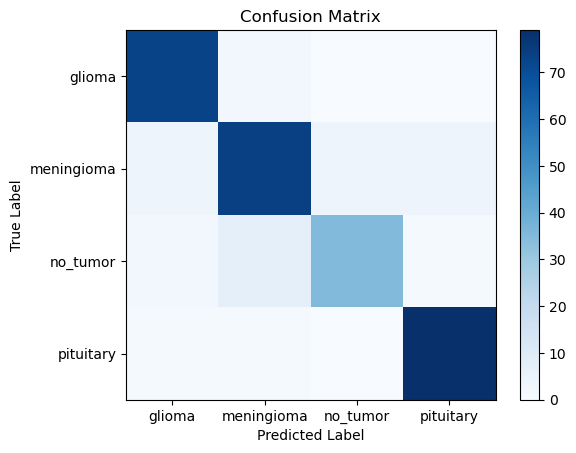

Copyable text result: 
 [[73  2  0  0]
 [ 4 74  4  4]
 [ 2  7 35  1]
 [ 1  1  0 79]]


In [19]:
y_pred = np.argmax(model.predict(x_test), axis=1)
matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

plt.imshow(matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1, 2, 3], ['glioma', 'meningioma', 'no_tumor', 'pituitary'])
plt.yticks([0, 1, 2, 3], ['glioma', 'meningioma', 'no_tumor', 'pituitary'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("Copyable text result: \n", matrix)

**Model and validation accuracy / loss graphs**

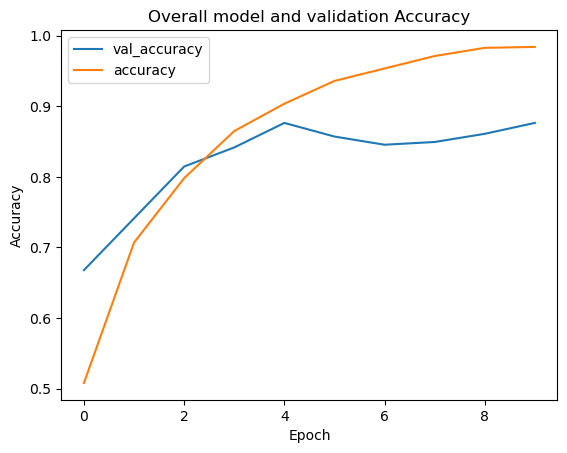

In [20]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Overall model and validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['val_accuracy', 'accuracy'], loc='upper left')
plt.show()

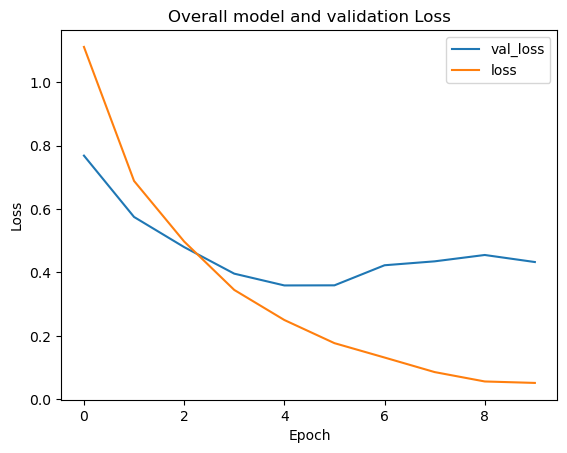

In [21]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Overall model and validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'loss'], loc='upper right')
plt.show()

# Exporting the model

In [20]:
model.save('/kaggle/working/bt_ai_EXP3-95acc-02lss-24-04-23.h5')